In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data = pd.read_csv("dataset_invade.csv")
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,No
1,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,No
2,0,tcp,private,S0,0,0,0,0,0,0,...,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,Yes
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00,No
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocol_type           148517 non-null  object 
 2   service                 148517 non-null  object 
 3   flag                    148517 non-null  object 
 4   src_bytes               148517 non-null  int64  
 5   dst_bytes               148517 non-null  int64  
 6   land                    148517 non-null  int64  
 7   wrong_fragment          148517 non-null  int64  
 8   urgent                  148517 non-null  int64  
 9   hot                     148517 non-null  int64  
 10  logged_in               148517 non-null  int64  
 11  num_compromised         148517 non-null  int64  
 12  count                   148517 non-null  int64  
 13  srv_count               148517 non-null  int64  
 14  serror_rate         

In [5]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,logged_in,num_compromised,count,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.402789,0.255062,83.336561,28.251937,0.256925,0.137947,0.672983,0.067761,0.097441,183.928042,119.462661,0.534521,0.084103
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.490461,22.231375,116.760741,75.369635,0.431918,0.339387,0.436544,0.194666,0.258886,98.528328,111.232318,0.448061,0.194102
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.100000,0.000000,0.000000,87.000000,11.000000,0.050000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,72.000000,0.600000,0.020000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,141.000000,17.000000,0.850000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,1.000000,7479.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000


In [6]:
data.shape

(148517, 24)

In [39]:
data.isnull().sum()

duration                  0
protocol_type             0
service                   0
flag                      0
src_bytes                 0
dst_bytes                 0
land                      0
wrong_fragment            0
urgent                    0
hot                       0
logged_in                 0
num_compromised           0
count                     0
srv_count                 0
serror_rate               0
rerror_rate               0
same_srv_rate             0
diff_srv_rate             0
srv_diff_host_rate        0
dst_host_count            0
dst_host_srv_count        0
dst_host_same_srv_rate    0
dst_host_diff_srv_rate    0
attack                    0
dtype: int64

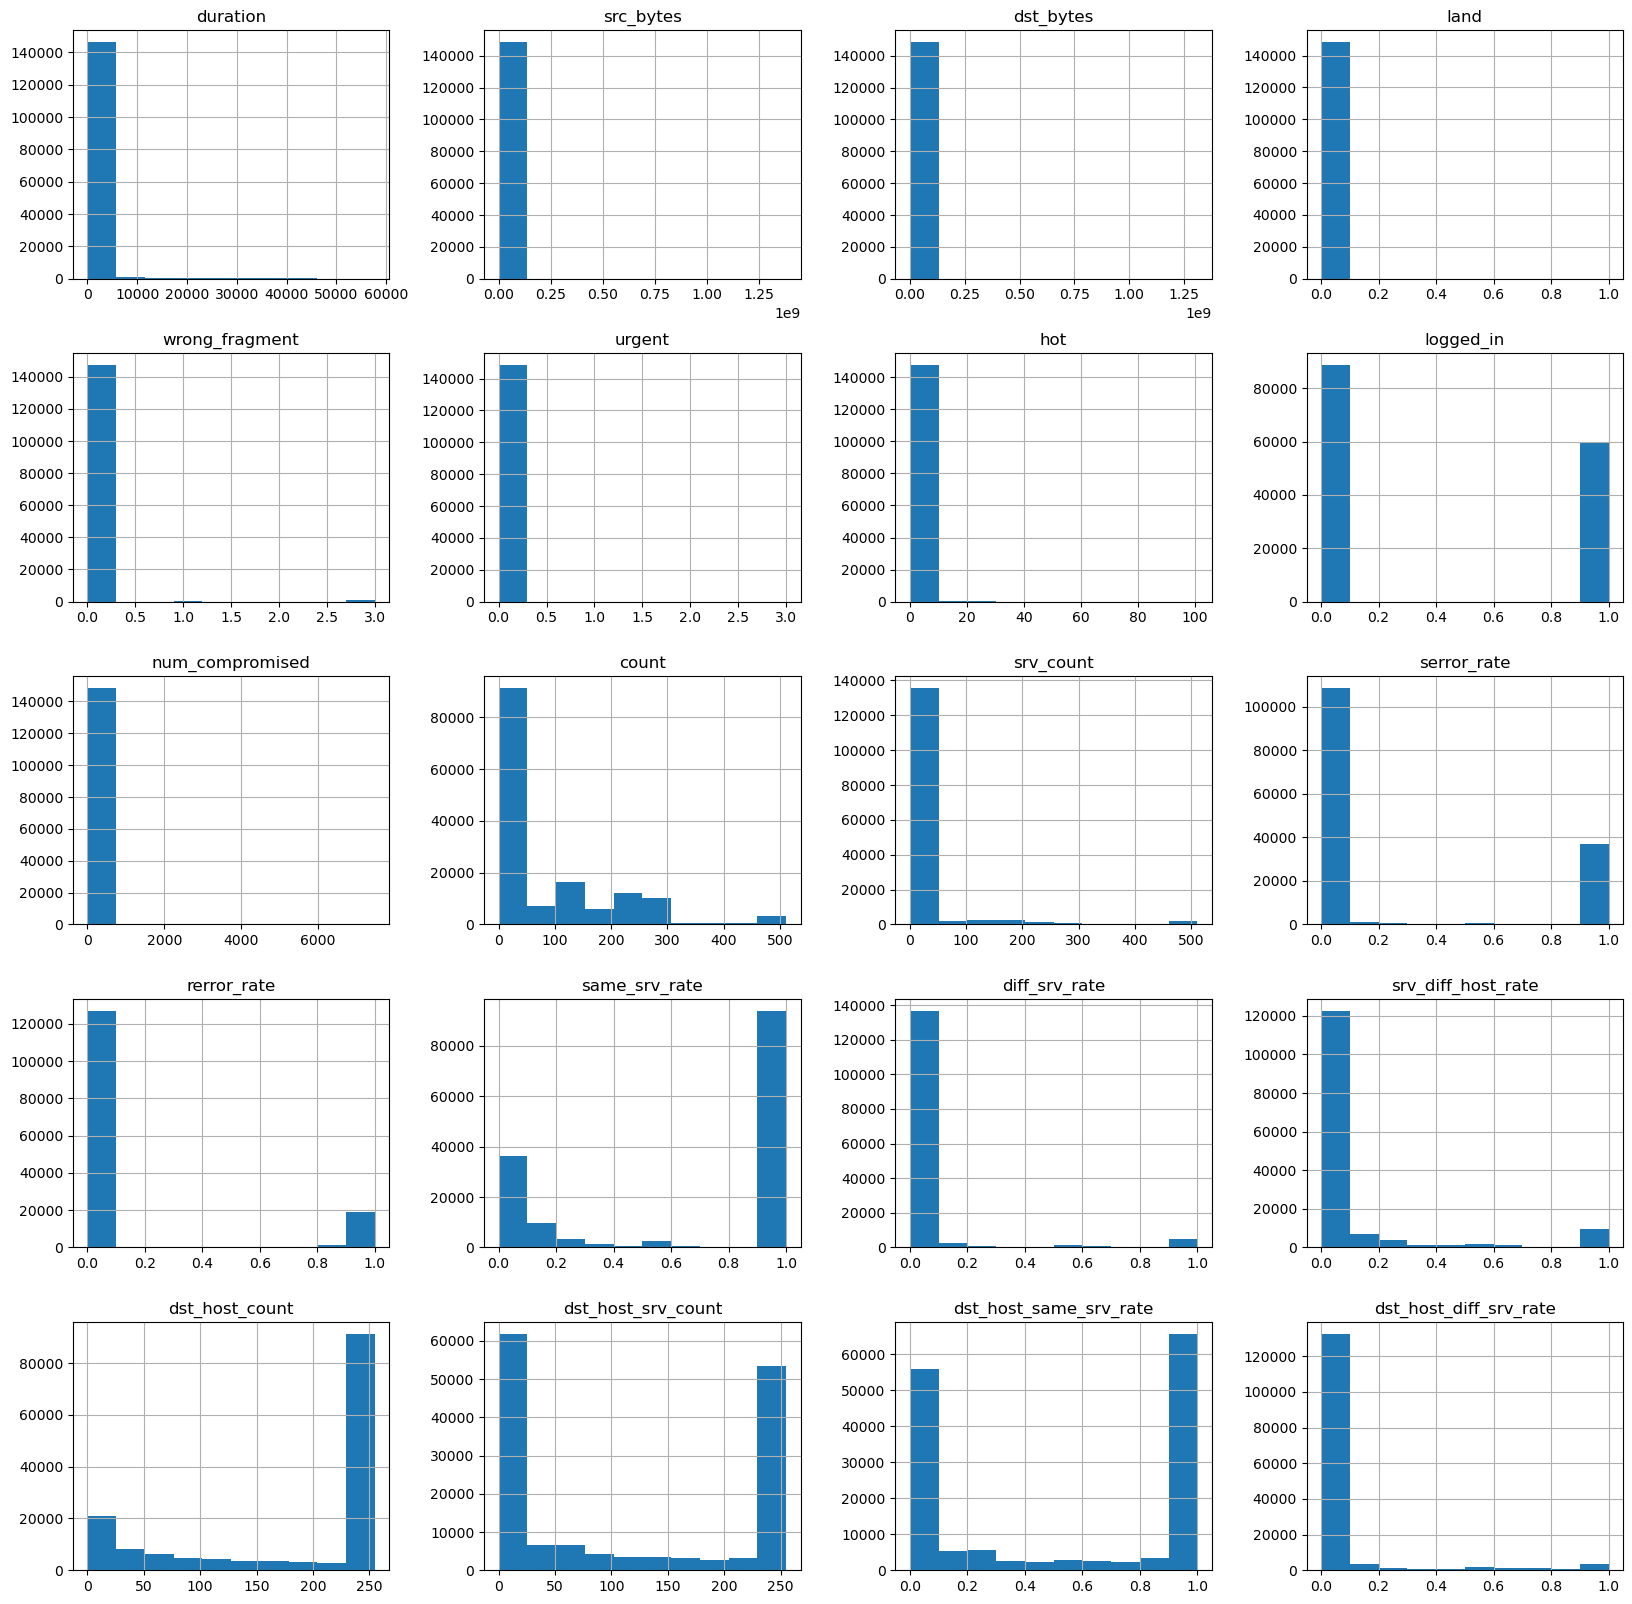

In [43]:
data.hist(figsize=(20, 20))
plt.show()

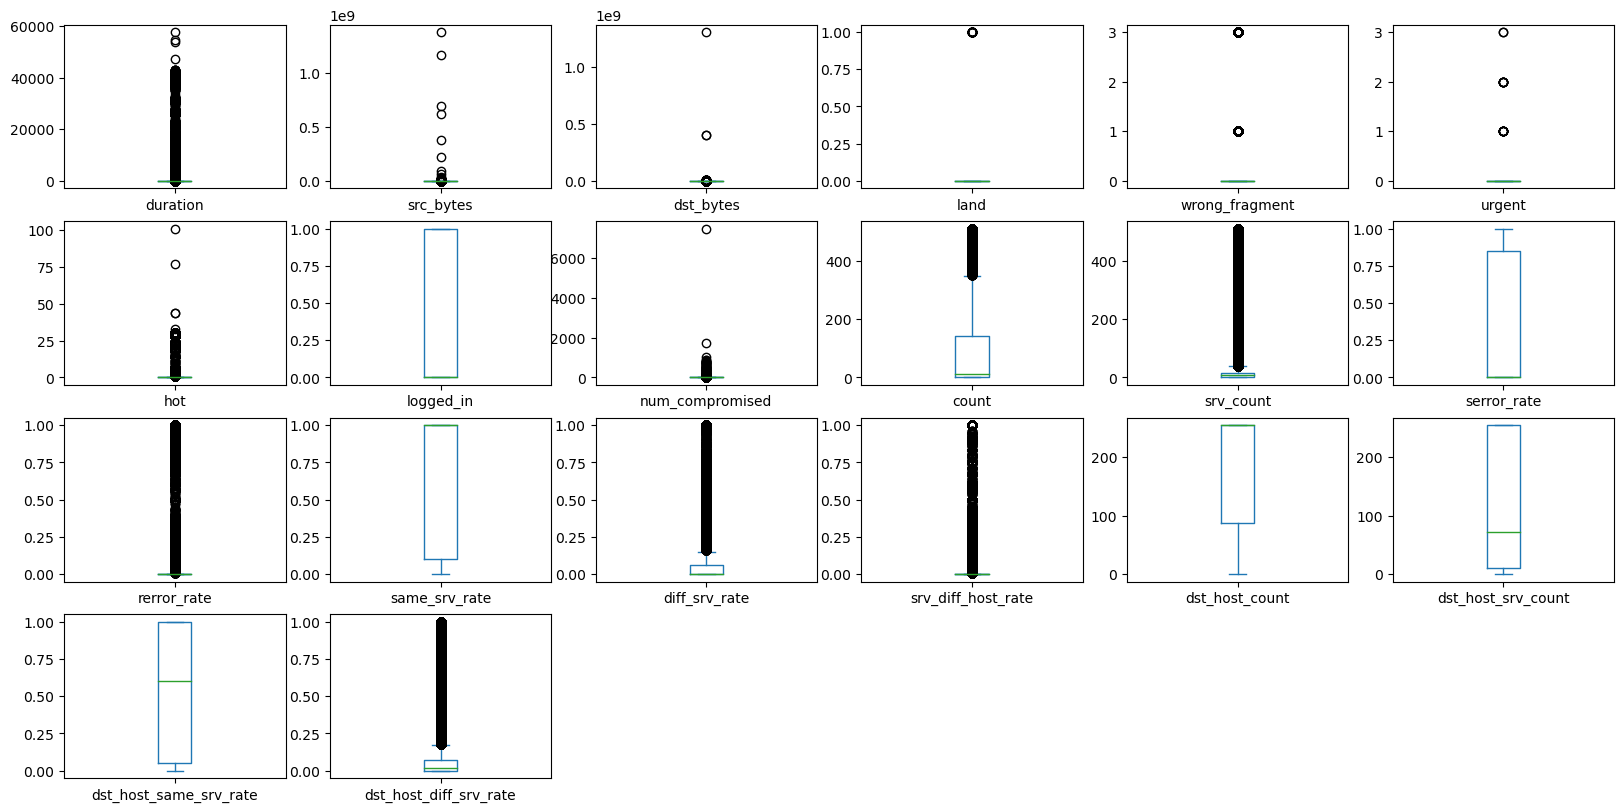

In [44]:
# Box plot for numerical columns
data.plot(kind='box', subplots=True, layout=(8, 6), figsize=(20, 20), sharex=False, sharey=False)
plt.show()

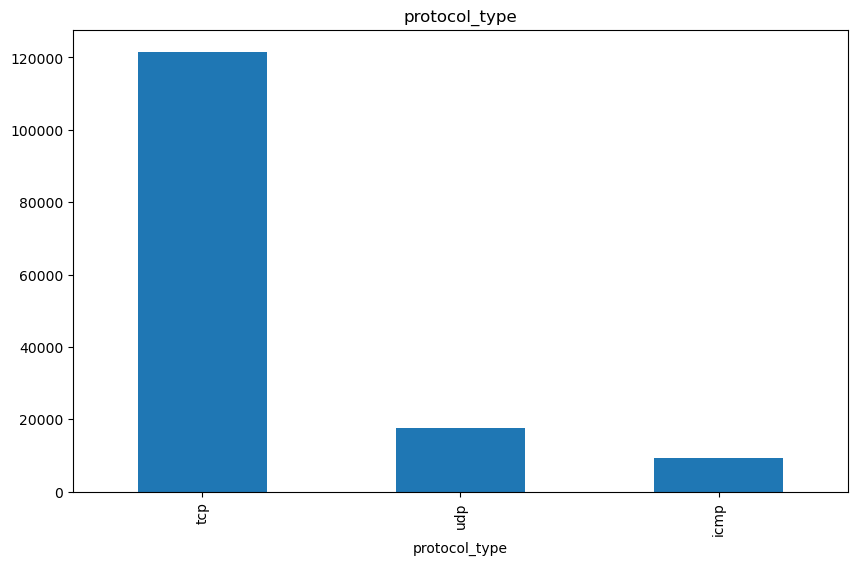

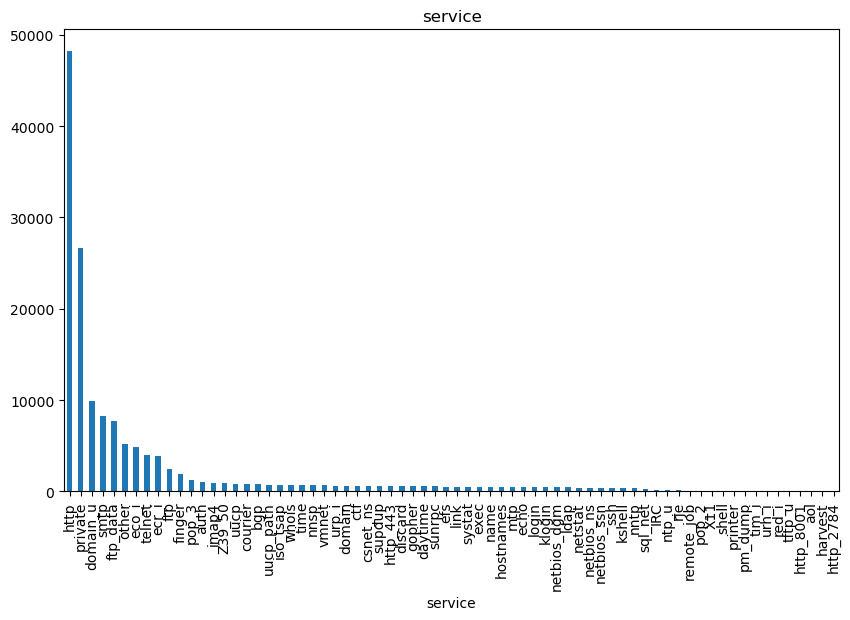

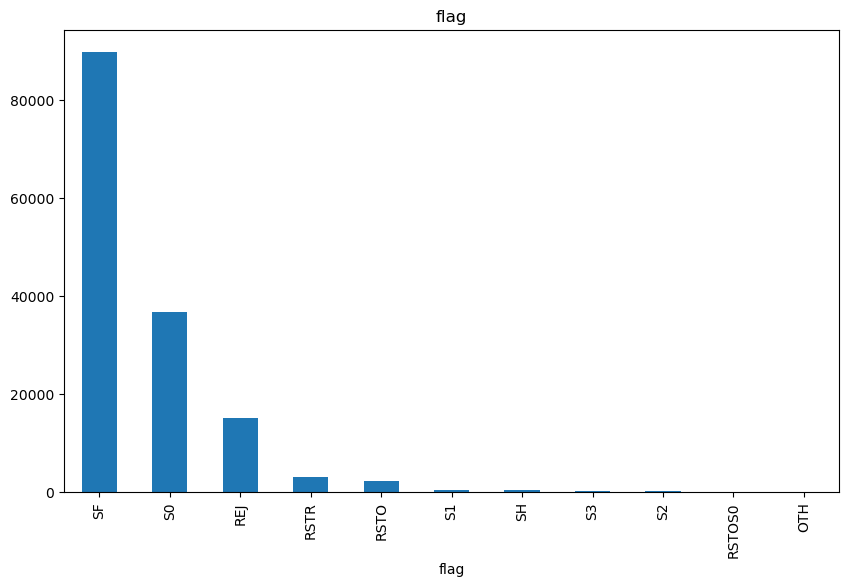

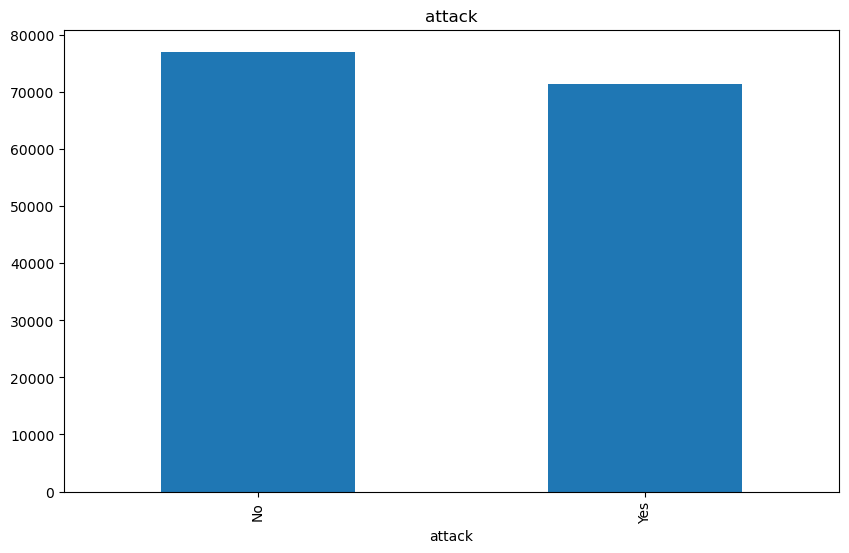

In [46]:
# Bar plot for categorical columns
categorical_columns = ["protocol_type", "service", "flag", "attack"]
for column in categorical_columns:
    data[column].value_counts().plot(kind='bar', figsize=(10, 6))
    plt.title(column)
    plt.show()

In [35]:
cat_columns = ["protocol_type", "service", "flag"]
num_columns = list(set(data.columns) - set(cat_columns) - {"attack"})

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_columns)])

In [62]:
X = data.drop(columns=["attack"])
Y = data["attack"]
X.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,srv_count,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,2,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60
2,0,tcp,private,S0,0,0,0,0,0,0,...,6,1.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05
3,0,tcp,http,SF,232,8153,0,0,0,0,...,5,0.2,0.0,1.00,0.00,0.00,30,255,1.00,0.00
4,0,tcp,http,SF,199,420,0,0,0,0,...,32,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear', random_state=42))])

In [65]:
pipeline.fit(X_train, Y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['dst_host_count',
                                                   'srv_diff_host_rate',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate',
                                                   'src_bytes',
                                                   'num_compromised',
                                                   'wrong_fragment',
                                                   'dst_bytes', 'diff_srv_rate',
                                                   'land', 'count', 'srv_count',
                                                   'same_srv_rate',
                                                   'rerror_rate', 'duration',
                                                   'urgent', 'logged_in',
                                                   'serror_rate', 'hot',
                                                   'dst_host_diff_srv_rate']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'service',
                                                   'flag'])])),
                ('classifier', SVC(kernel='linear', random_state=42))])

In [66]:
Y_pred = pipeline.predict(X_test)

In [67]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

Accuracy: 0.9506127120926474

Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.95      0.95     15450
         Yes       0.95      0.95      0.95     14254

    accuracy                           0.95     29704
   macro avg       0.95      0.95      0.95     29704
weighted avg       0.95      0.95      0.95     29704


Confusion Matrix:
 [[14731   719]
 [  748 13506]]


In [71]:
# Building the preprocessing and classification pipeline for Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [73]:
rf_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['dst_host_count',
                                                   'srv_diff_host_rate',
                                                   'dst_host_srv_count',
                                                   'dst_host_same_srv_rate',
                                                   'src_bytes',
                                                   'num_compromised',
                                                   'wrong_fragment',
                                                   'dst_bytes', 'diff_srv_rate',
                                                   'land', 'count', 'srv_count',
                                                   'same_srv_rate',
                                                   'rerror_rate', 'duration',
                                                   'urgent', 'logged_in',
                                                   'serror_rate', 'hot',
                                                   'dst_host_diff_srv_rate']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['protocol_type', 'service',
                                                   'flag'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [78]:
Y_pred_rf = rf_pipeline.predict(X_test)

In [79]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(Y_test, Y_pred_rf))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_rf, zero_division=1))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred_rf))


Random Forest:
Accuracy: 0.995253164556962

Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      1.00     15450
         Yes       1.00      0.99      1.00     14254

    accuracy                           1.00     29704
   macro avg       1.00      1.00      1.00     29704
weighted avg       1.00      1.00      1.00     29704


Confusion Matrix:
 [[15400    50]
 [   91 14163]]


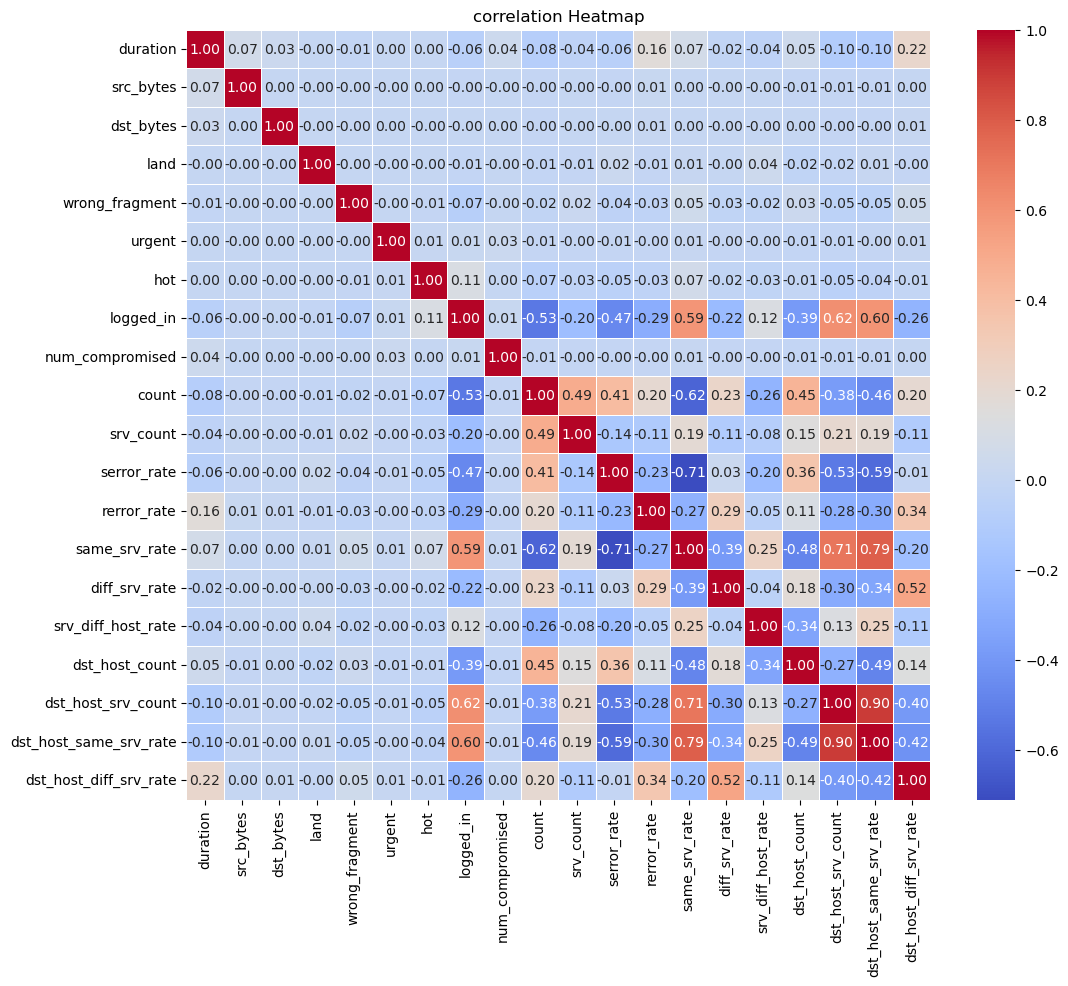

In [69]:
numeric_data = data.select_dtypes(include = ['number'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()